In [137]:
import numpy as np
import pandas as pd

In [138]:
df = pd.read_csv('new_york_citi_bike.csv')

In [139]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,327,00:02.0,05:29.3,3733,Avenue C & E 18 St,40.730563,-73.973984,504,1 Ave & E 16 St,40.732219,-73.981656,39213,Subscriber,1968,1
1,1145,00:04.1,19:09.8,3329,Degraw St & Smith St,40.682915,-73.993182,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,21257,Customer,1969,0
2,1293,00:07.3,21:40.8,3168,Central Park West & W 85 St,40.784727,-73.969617,423,W 54 St & 9 Ave,40.765849,-73.986905,15242,Customer,1969,0
3,1753,00:08.1,29:21.5,3299,E 98 St & Park Ave,40.788130,-73.952060,3160,Central Park West & W 76 St,40.778968,-73.973747,38760,Subscriber,1990,1
4,613,00:12.9,10:26.2,486,Broadway & W 29 St,40.746201,-73.988557,478,11 Ave & W 41 St,40.760301,-73.998842,32094,Subscriber,1992,1


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
tripduration               1048575 non-null int64
starttime                  1048575 non-null object
stoptime                   1048575 non-null object
start station id           1048575 non-null int64
start station name         1048575 non-null object
start station latitude     1048575 non-null float64
start station longitude    1048575 non-null float64
end station id             1048575 non-null int64
end station name           1048575 non-null object
end station latitude       1048575 non-null float64
end station longitude      1048575 non-null float64
bikeid                     1048575 non-null int64
usertype                   1048575 non-null object
birth year                 1048575 non-null int64
gender                     1048575 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 120.0+ MB


In [141]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.008363e+03,1.654709e+03,4.073735e+01,-7.398213e+01,1.648128e+03,4.073698e+01,-7.398234e+01,2.961550e+04,1.980670e+03,1.167502e+00
std,1.107315e+04,1.481409e+03,3.024812e-02,2.016519e-02,1.481127e+03,3.014928e-02,2.023096e-02,7.699267e+03,1.210761e+01,5.571929e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.404282e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.860000e+02,3.770000e+02,4.071755e+01,-7.399596e+01,3.760000e+02,4.071749e+01,-7.399662e+01,2.508500e+04,1.970000e+03,1.000000e+00
50%,6.570000e+02,5.080000e+02,4.073705e+01,-7.398584e+01,5.070000e+02,4.073653e+01,-7.398627e+01,3.078300e+04,1.983000e+03,1.000000e+00
75%,1.139000e+03,3.295000e+03,4.075725e+01,-7.397121e+01,3.295000e+03,4.075680e+01,-7.397121e+01,3.526100e+04,1.990000e+03,2.000000e+00
max,2.904620e+06,3.811000e+03,4.081439e+01,-7.390774e+01,3.811000e+03,4.081439e+01,-7.390774e+01,4.097200e+04,2.003000e+03,2.000000e+00


## Data Cleaning

In [142]:
columns_todrop = ['starttime','stoptime','start station id','start station name','end station id','end station name','bikeid']

df.drop(columns = columns_todrop, axis = 1, inplace = True)

In [143]:
df.shape

(1048575, 8)

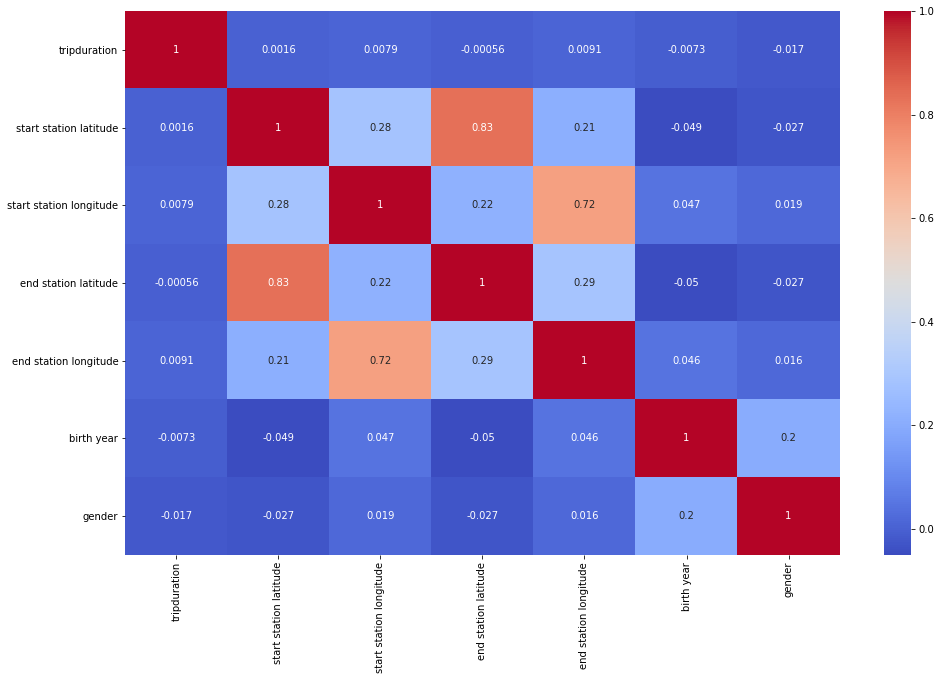

In [144]:
feat_corr = df.corr()

plt.figure( figsize = (16,10))
sns.heatmap(feat_corr, cmap = 'coolwarm',annot = True)

In [145]:
df.isnull().sum()

tripduration               0
start station latitude     0
start station longitude    0
end station latitude       0
end station longitude      0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [146]:
duplicate_df = df[df.duplicated()]
print('Duplicate Rows: ', duplicate_df.shape[0])

Duplicate Rows:  4408


### Trip Duration - Feature Extraction

In [148]:
df['tripduration'] = df['tripduration']/60

In [149]:
df.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,5.450000,40.730563,-73.973984,40.732219,-73.981656,Subscriber,1968,1
1,19.083333,40.682915,-73.993182,40.693083,-73.971789,Customer,1969,0
2,21.550000,40.784727,-73.969617,40.765849,-73.986905,Customer,1969,0
3,29.216667,40.788130,-73.952060,40.778968,-73.973747,Subscriber,1990,1
4,10.216667,40.746201,-73.988557,40.760301,-73.998842,Subscriber,1992,1


In [150]:
df['tripduration'] = df['tripduration'].round(3)

In [151]:
df.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,5.450,40.730563,-73.973984,40.732219,-73.981656,Subscriber,1968,1
1,19.083,40.682915,-73.993182,40.693083,-73.971789,Customer,1969,0
2,21.550,40.784727,-73.969617,40.765849,-73.986905,Customer,1969,0
3,29.217,40.788130,-73.952060,40.778968,-73.973747,Subscriber,1990,1
4,10.217,40.746201,-73.988557,40.760301,-73.998842,Subscriber,1992,1


### Latitude and Longitude - Feature Extraction

In [152]:
df['start station latitude'].describe()

count    1.048575e+06
mean     4.073735e+01
std      3.024812e-02
min      4.065540e+01
25%      4.071755e+01
50%      4.073705e+01
75%      4.075725e+01
max      4.081439e+01
Name: start station latitude, dtype: float64

In [153]:
df['end station latitude'].describe()

count    1.048575e+06
mean     4.073698e+01
std      3.014928e-02
min      4.065540e+01
25%      4.071749e+01
50%      4.073653e+01
75%      4.075680e+01
max      4.081439e+01
Name: end station latitude, dtype: float64

In [154]:
df['start station longitude'].describe()

count    1.048575e+06
mean    -7.398213e+01
std      2.016519e-02
min     -7.402535e+01
25%     -7.399596e+01
50%     -7.398584e+01
75%     -7.397121e+01
max     -7.390774e+01
Name: start station longitude, dtype: float64

In [155]:
df['end station longitude'].describe()

count    1.048575e+06
mean    -7.398234e+01
std      2.023096e-02
min     -7.404282e+01
25%     -7.399662e+01
50%     -7.398627e+01
75%     -7.397121e+01
max     -7.390774e+01
Name: end station longitude, dtype: float64

In [157]:
start_lat = np.where((df['start station latitude']< -90) | (df['start station latitude'] > 90))

In [158]:
start_lat

(array([], dtype=int64),)

In [159]:
start_long = np.where((df['start station longitude']< -180) | (df['start station longitude'] > 180))

In [160]:
start_long

(array([], dtype=int64),)

In [161]:
end_lat = np.where((df['end station latitude']< -90) | (df['end station latitude'] > 90))

In [162]:
end_lat

(array([], dtype=int64),)

In [163]:
end_long = np.where((df['end station longitude']< -180) | (df['end station longitude'] > 180))

In [164]:
end_long

(array([], dtype=int64),)

Considering the city of New York, we have to keep in mind the longitude and latitude boundaries of the city. After some domain research, i found out that,<br>

<b>Longitude Boundary - (-74.03, -73.75)<br>

<b>Latitude Boundary - (40.63, 40.85)<br>
    
Hence, we need to remove values outside this boundary.

In [165]:
nyc_boundary = {'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

In [166]:
outside_nyc = np.where(~((df['start station longitude'] >= nyc_boundary['min_lng'] ) & (df['start station longitude'] <= nyc_boundary['max_lng']) &
            (df['start station latitude'] >= nyc_boundary['min_lat']) & (df['start station latitude'] <= nyc_boundary['max_lat']) &
            (df['end station longitude'] >= nyc_boundary['min_lng']) & (df['end station longitude'] <= nyc_boundary['max_lng']) &
            (df['end station latitude'] >=nyc_boundary['min_lat']) & (df['end station latitude'] <= nyc_boundary['max_lat'])))

In [168]:
outside_nyc

(array([], dtype=int64),)

In [180]:
def distance(lat1, long1, lat2, long2):
    data = [df]
    for i in data:
        R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        d = (R * c)
        i['trip_distance'] = d
    return d

In [181]:
distance('start station latitude', 'start station longitude', 'end station latitude','end station longitude')

0          0.417659
1          1.322852
2          1.587362
3          1.299336
4          1.113123
5          0.604318
6          0.604318
7          1.611522
8          0.855361
9          0.443298
10         3.149221
11         1.402630
12         0.342587
13         0.409985
14         1.611522
15         0.313673
16         0.803138
17         0.852498
18         1.357578
19         1.587362
20         0.572293
21         0.285022
22         2.531804
23         1.310354
24         0.550658
25         1.241245
26         1.267014
27         0.322192
28         3.149221
29         1.287900
             ...   
1048545    1.330387
1048546    3.746732
1048547    0.341488
1048548    0.575990
1048549    3.012852
1048550    2.049733
1048551    0.268771
1048552    0.832066
1048553    1.156876
1048554    0.603822
1048555    0.816552
1048556    0.839189
1048557    1.643123
1048558    2.501984
1048559    1.860250
1048560    2.449362
1048561    0.550658
1048562    0.649712
1048563    0.176160


In [182]:
df.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender,trip_distance
0,5.450,40.730563,-73.973984,40.732219,-73.981656,Subscriber,1968,1,0.417659
1,19.083,40.682915,-73.993182,40.693083,-73.971789,Customer,1969,0,1.322852
2,21.550,40.784727,-73.969617,40.765849,-73.986905,Customer,1969,0,1.587362
3,29.217,40.788130,-73.952060,40.778968,-73.973747,Subscriber,1990,1,1.299336
4,10.217,40.746201,-73.988557,40.760301,-73.998842,Subscriber,1992,1,1.113123


### Gender Column

In [190]:
def replaceGender(x):
    abc = ''
    try:
        if x == 0:
            abc = 'Unknown'
        elif x == 1:
            abc = 'Male'
        else:
            abc = 'Female'
    except Exception as e:
        print("Exception",x)
        return x
    return abc

In [191]:
df['gender'] = df['gender'].apply(replaceGender)

In [192]:
df.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender,trip_distance
0,5.450,40.730563,-73.973984,40.732219,-73.981656,Subscriber,1968,Male,0.417659
1,19.083,40.682915,-73.993182,40.693083,-73.971789,Customer,1969,Unknown,1.322852
2,21.550,40.784727,-73.969617,40.765849,-73.986905,Customer,1969,Unknown,1.587362
3,29.217,40.788130,-73.952060,40.778968,-73.973747,Subscriber,1990,Male,1.299336
4,10.217,40.746201,-73.988557,40.760301,-73.998842,Subscriber,1992,Male,1.113123
